92
36


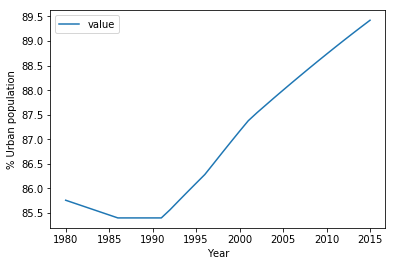

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Using the World Bank's World Development Indicators (or WDI) dataset, you're going to plot 
# the percentage of the population of Australia in urban centers since 1980.
#Your job is to loop over chunks of the WDI dataset; from each chunk, you will filter out 
#rows describing Australia's "percent urban population." You'll then concatenate the filtered chunks and plot the results. 

# Create empty list: dfs
dfs = []

# Loop over 'WDI.csv'
for chunk in pd.read_csv('WDI.csv', chunksize=1000):
    # Create the first Series
    is_urban = chunk['Indicator Name']=='Urban population (% of total)'
    # Create the second Series
    is_AUS = chunk['Country Code']=='AUS'

    # Create the filtered chunk: filtered
    filtered=chunk.loc[is_urban & is_AUS]

    # Append the filtered chunk to the list dfs
    dfs.append(filtered)

print(len(dfs))
df=pd.concat(dfs)
print(len(df))

df.plot.line(x='Year', y='value')
plt.ylabel('% Urban population')
plt.show()    